# Cohort Analysis

## Load Library & Dataset

In [1]:
#import librarys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy.stats import skew, kurtosis

In [2]:
#import Dataset
retail = pd.read_excel('Online Retail.xlsx')

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Pre-Processing Data

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Duplicated Value

In [4]:
retail.duplicated().sum()

5268

In [5]:
# Menampilkan baris yang terduplikasi
duplicate_rows = retail[retail.duplicated()]  # `
duplicate_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [6]:
total_data = len(retail)
total_duplicates = retail.duplicated().sum()
percentage_duplicates = (total_duplicates / total_data) * 100
percentage_duplicates

0.9721189350979592

In [7]:
retail = retail.drop_duplicates()
retail.duplicated().sum()

0

## Missing Value

In [8]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [9]:
missing_percentage = retail.isna().mean() * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

Terdapat nilai hilang pada kolom Description sebesar 0.27% dari total data, dan 25% pada kolom CustomerID. Opsi handling missing value :


1. Menghapus baris adalah solusi yang paling sederhana namun bisa mengurangi jumlah data yang signifikan. Penghapusan ini cocok jika jumlah data yang cukup besar sehingga kehilangan sebagian data tidak terlalu mempengaruhi analisis keseluruhan.

2. Jika CustomerID adalah numerik (meskipun biasanya merupakan identifier dan bukan variabel kuantitatif), kamu bisa mengisinya dengan nilai statistik seperti mean atau median. Namun, pada kasus CustomerID, pengisian nilai mungkin tidak relevan karena bersifat kategorikal dan unik untuk setiap konsumen.

3. Untuk data kategorikal seperti CustomerID, pengisian dengan modus bisa menjadi pilihan, asalkan ada asumsi yang logis di balik penggunaan ID pelanggan yang sama untuk transaksi yang berbeda.

4. Untuk CustomerID, kamu bisa menetapkan suatu nilai khusus untuk mewakili data yang hilang, seperti menggantinya dengan "Unknown" atau nilai spesifik lain. Ini memungkinkan kamu untuk tetap menyertakan baris data dalam analisis tanpa harus menghapusnya.

In [10]:
# Isi nilai yang hilang dengan 'Unknown' atau ID unik lainnya
retail['CustomerID'].fillna('Unknown', inplace=True)
retail['Description'].fillna('Unknown', inplace=True)

retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Exploratory Data Analysis

In [11]:
retail.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [12]:
retail[retail['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [13]:
# Filter data di mana Quantity < 0
filtered_df = retail[retail['Quantity'] < 0]

# Hitung jumlah baris yang memenuhi kriteria
jumlah = filtered_df.shape[0]
total = retail.shape[0]
persentase = (jumlah / total) * 100

print("Quantity < 0:", jumlah)
print("% Quantity < 0 :", persentase, "%")


Quantity < 0: 10587
% Quantity < 0 : 1.9728272718633126 %


In [14]:
# Filter data di mana UnitPrice < 0
filtered_df = retail[retail['UnitPrice'] < 0]

# Hitung jumlah baris yang memenuhi kriteria
jumlah = filtered_df.shape[0]
total = retail.shape[0]
persentase = (jumlah / total) * 100

print("UnitPrice < 0:", jumlah)
print("% UnitPrice < 0 :", persentase, "%")


UnitPrice < 0: 2
% UnitPrice < 0 : 0.00037268863169232316 %


Terdapat nilai minus pada Quantity dan UnitPrice, dalam bisnis retail hal ini mungkin dapat terjadi untuk tipe barang yang melakukan proses return. namun pada case kali ini kami memutuskan untuk menghilangkan data dengan Quantity dan UnitPrice < 0.

In [15]:
# Filter data untuk memilih baris di mana Quantity > 0 dan UnitPrice > 0
retail_df = retail[(retail['Quantity'] > 0) & (retail['UnitPrice'] > 0)]

# Menampilkan deskripsi statistik dari DataFrame yang telah difilter
retail_df.describe()


,Quantity,UnitPrice
count,524878.000000,524878.000000
mean,10.616600,3.922573
std,156.280031,36.093028
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,11.000000,4.130000
max,80995.000000,13541.330000


## Cohort Analysis

In [16]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
retail_df['InvoiceMonth'] = retail_df['InvoiceDate'].apply(get_month)
grouping = retail_df.groupby('CustomerID')['InvoiceMonth']
retail_df['CohortMonth'] = grouping.transform('min')
retail_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_18536\2269148924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['InvoiceMonth'] = retail_df['InvoiceDate'].apply(get_month)
C:\Users\USER\AppData\Local\Temp\ipykernel_18536\2269148924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['CohortMonth'] = grouping.transform('min')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [18]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [26]:
invoice_year, invoice_month, _ = get_date_int(retail_df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(retail_df, 'CohortMonth')

# Menghitung perbedaan tahun dan bulan
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Mengonversi perbedaan tahun menjadi bulan dan menambahkan perbedaan bulan
total_months_diff = years_diff * 12 + months_diff

# Membagi perbedaan bulan total dengan 3 untuk mendapatkan CohortIndex per 3 bulan
retail_df['CohortIndex'] = (total_months_diff // 3) + 1

retail_df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_18536\204664356.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['CohortIndex'] = (total_months_diff // 3) + 1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [27]:
grouping = retail_df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
print(cohort_counts)

CohortIndex      1      2      3      4      5
CohortMonth                                   
2010-12-01   886.0  553.0  527.0  595.0  236.0
2011-01-01   417.0  238.0  210.0  228.0    NaN
2011-02-01   380.0  199.0  206.0  130.0    NaN
2011-03-01   452.0  187.0  237.0   39.0    NaN
2011-04-01   300.0  133.0  122.0    NaN    NaN
2011-05-01   284.0  130.0   91.0    NaN    NaN
2011-06-01   242.0  127.0   23.0    NaN    NaN
2011-07-01   188.0   79.0    NaN    NaN    NaN
2011-08-01   169.0   55.0    NaN    NaN    NaN
2011-09-01   299.0   34.0    NaN    NaN    NaN
2011-10-01   358.0    NaN    NaN    NaN    NaN
2011-11-01   323.0    NaN    NaN    NaN    NaN
2011-12-01    41.0    NaN    NaN    NaN    NaN


<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

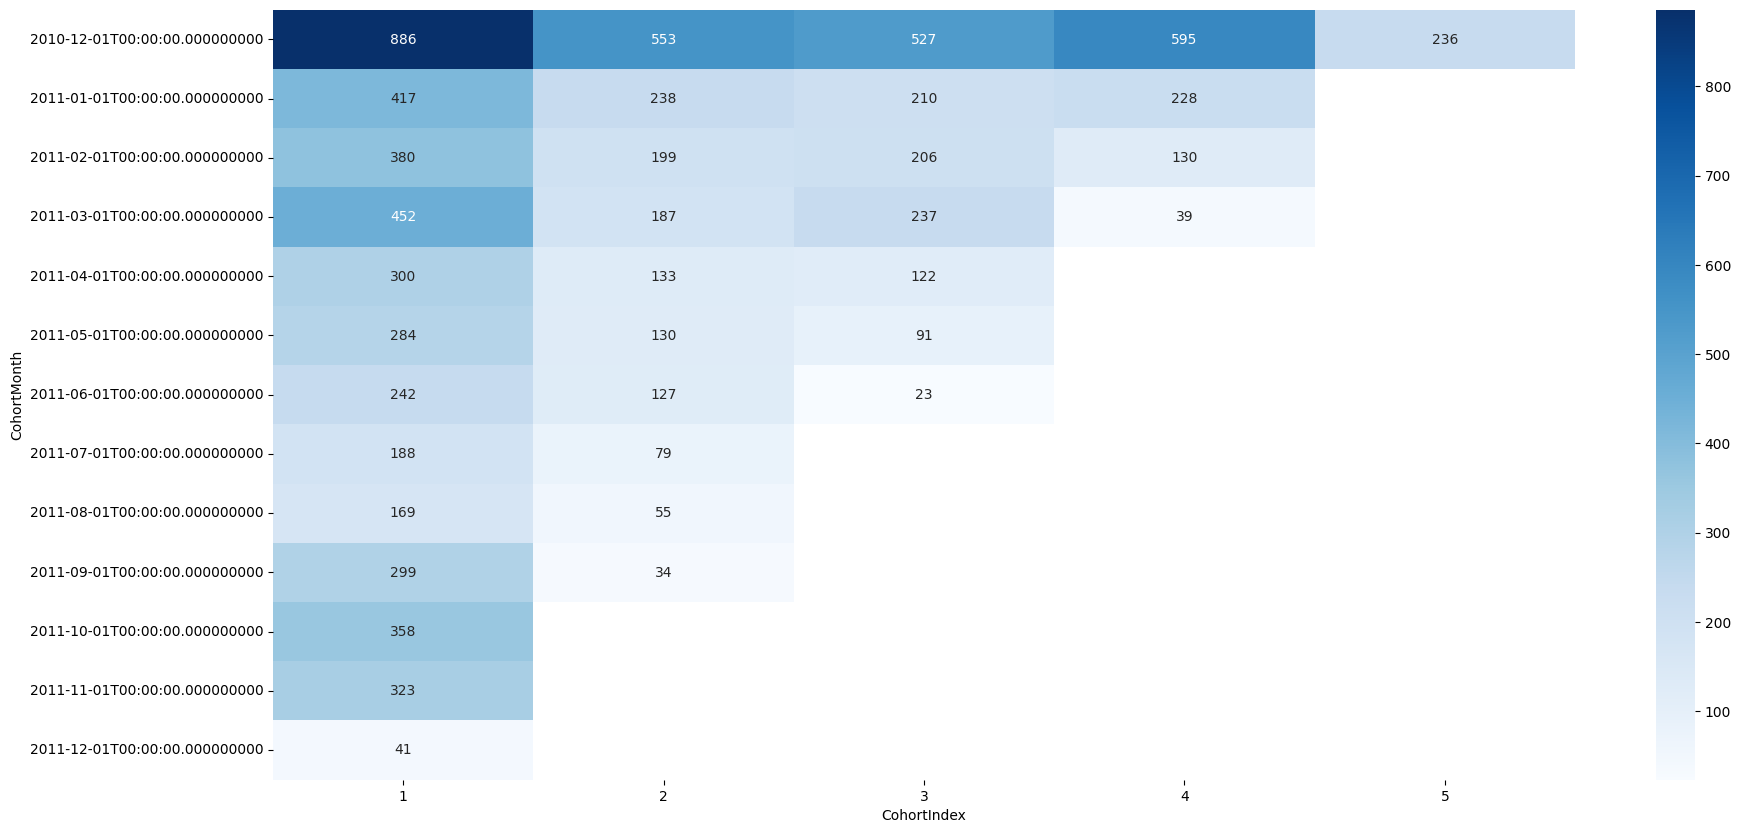

In [28]:
plt.figure(figsize=(21,10))
sns.heatmap(cohort_counts, annot=True, fmt='.0f', cmap='Blues')

In [29]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5
CohortMonth,,,,,
2010-12-01,100.0,62.4,59.5,67.2,26.6
2011-01-01,100.0,57.1,50.4,54.7,NaN
2011-02-01,100.0,52.4,54.2,34.2,NaN
2011-03-01,100.0,41.4,52.4,8.6,NaN
2011-04-01,100.0,44.3,40.7,NaN,NaN
2011-05-01,100.0,45.8,32.0,NaN,NaN
2011-06-01,100.0,52.5,9.5,NaN,NaN
2011-07-01,100.0,42.0,NaN,NaN,NaN
2011-08-01,100.0,32.5,NaN,NaN,NaN


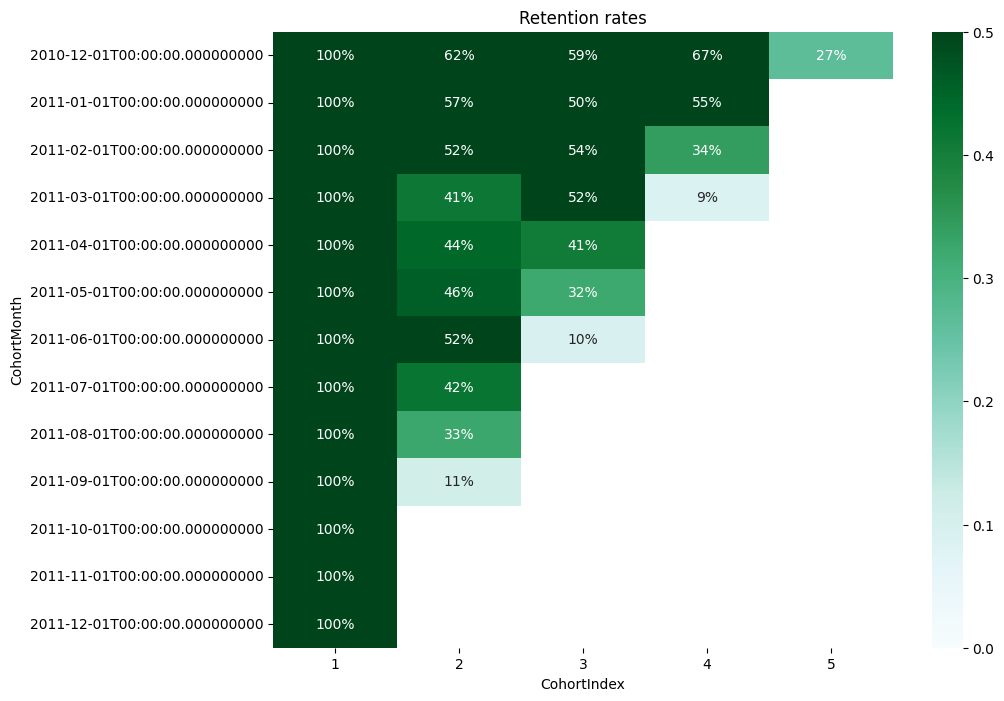

In [30]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
plt.show()

In [31]:
grouping = retail_df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity') 
average_quantity.round(1)

CohortIndex,1,2,3,4,5
CohortMonth,,,,,
2010-12-01,8.9,10.0,10.4,10.8,9.2
2011-01-01,16.0,14.4,13.6,10.1,NaN
2011-02-01,12.7,12.2,12.5,12.5,NaN
2011-03-01,10.7,12.3,12.7,9.7,NaN
2011-04-01,10.1,10.5,9.6,NaN,NaN
2011-05-01,11.5,10.3,39.8,NaN,NaN
2011-06-01,11.2,11.1,9.5,NaN,NaN
2011-07-01,9.7,7.1,NaN,NaN,NaN
2011-08-01,8.0,6.4,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

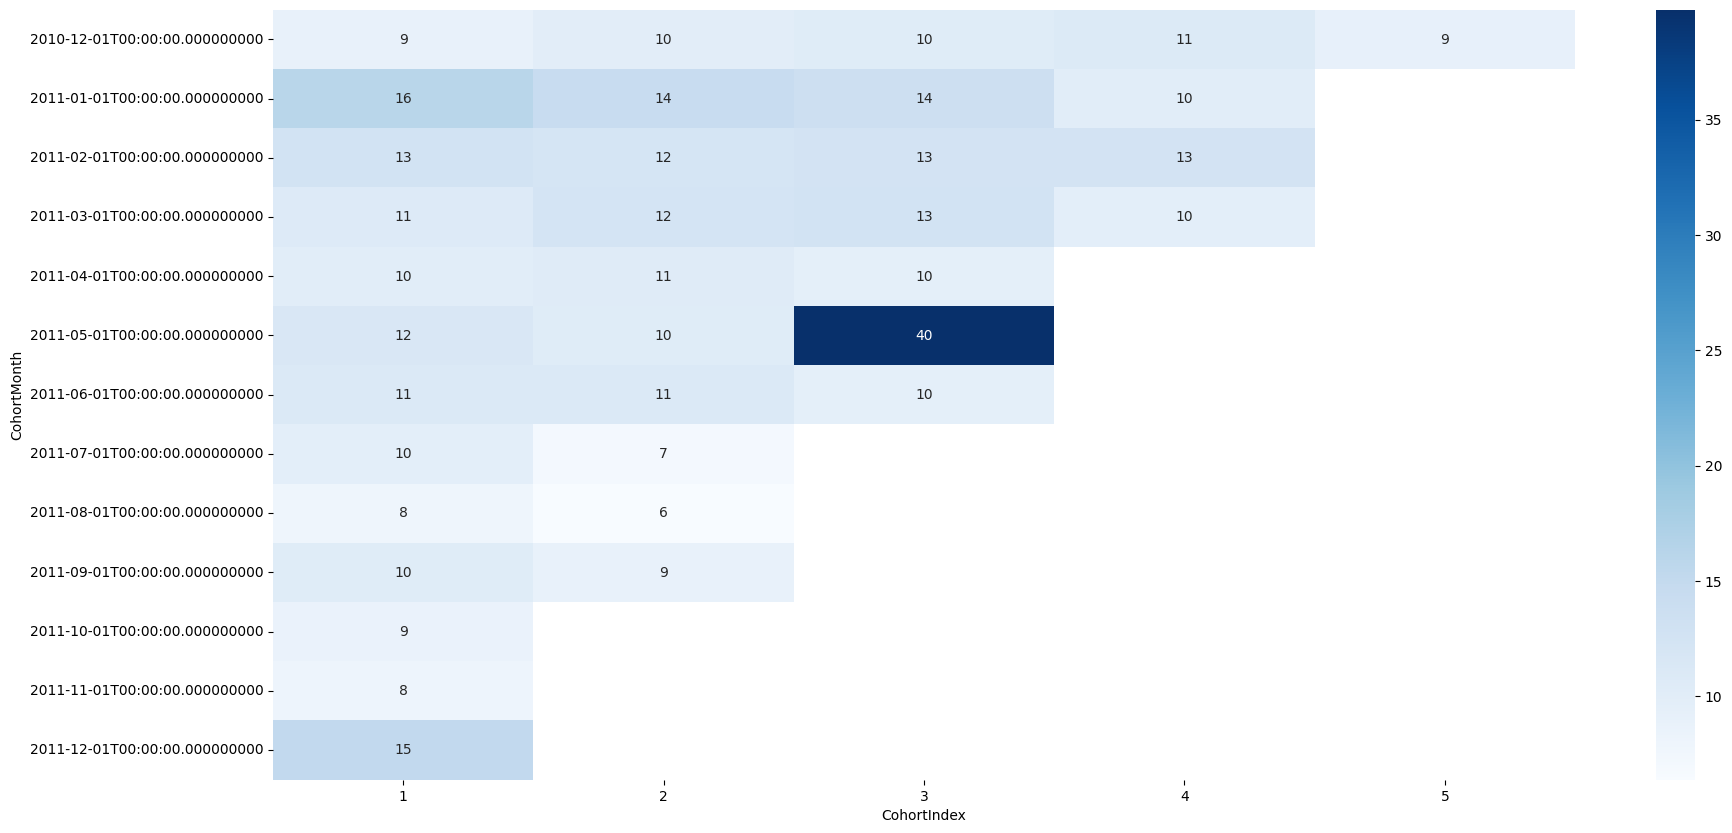

In [32]:
plt.figure(figsize=(21,10))
sns.heatmap(average_quantity, annot=True, fmt='.0f', cmap='Blues')